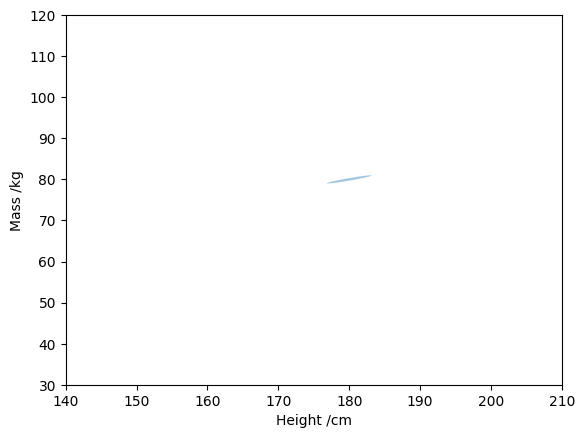

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()

def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)



e = get_cov_ellipse(np.array([[10,3],[3,1]]), (180, 80), 1, alpha=0.4)
ax.add_artist(e)

ax.set_xlim(140, 210)
ax.set_ylim(30, 120)
ax.set_xlabel('Height /cm')
ax.set_ylabel('Mass /kg')
plt.show()
